In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, cohen_kappa_score

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed = 2020
target_name = 'isup_grade'

In [3]:
train_df = pd.read_csv('../data/input/train.csv')
train_df.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


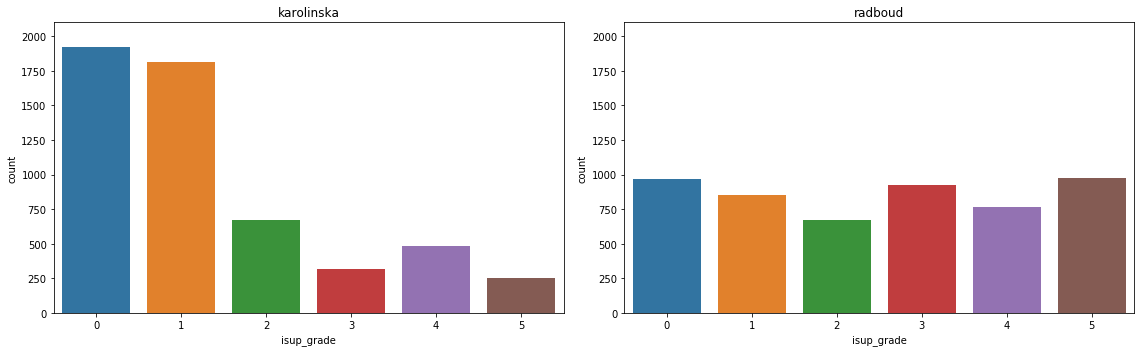

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(train_df[train_df['data_provider'] == 'karolinska'][target_name], ax=ax1)
ax1.set_title('karolinska')
ax1.set_ylim([0, 2100])

sns.countplot(train_df[train_df['data_provider'] == 'radboud'][target_name], ax=ax2)
ax2.set_title('radboud')
ax2.set_ylim([0, 2100])

plt.tight_layout()

In [5]:
trn_x, val_x = train_test_split(train_df,
                                                      test_size=0.2, 
                                                      shuffle=True, 
                                                      random_state=2020)

In [6]:
oof = np.load('../logs/clf_se_resnext101_32x4d_20200426102634_0.649/oof.npy')

In [7]:
oof_label = oof.argmax(1)

In [8]:
val_x['oof_label'] = oof_label

/home/naoki/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
kar_df = val_x[val_x['data_provider'] == 'karolinska']
rad_df = val_x[val_x['data_provider'] == 'radboud']

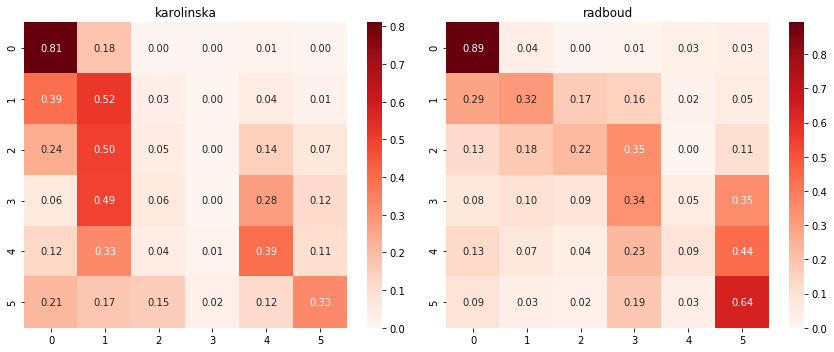

In [18]:
kar_cm = confusion_matrix(kar_df[target_name], kar_df['oof_label'])
kar_cm_ = kar_cm / np.sum(kar_cm, axis=1, keepdims=True)

rad_cm = confusion_matrix(rad_df[target_name], rad_df['oof_label'])
rad_cm_ = rad_cm / np.sum(rad_cm, axis=1, keepdims=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(kar_cm_, cmap='Reds', annot=True, fmt="1.2f", ax=ax1)
ax1.set_title('karolinska')

sns.heatmap(rad_cm_, cmap='Reds', annot=True, fmt="1.2f", ax=ax2)
ax2.set_title('radboud')
plt.tight_layout()

In [14]:
def quadratic_weighted_kappa(y_hat, y):
    return cohen_kappa_score(y_hat, y, weights='quadratic')

In [15]:
quadratic_weighted_kappa(kar_df[target_name], kar_df['oof_label'])

0.5517329774318691

In [16]:
quadratic_weighted_kappa(rad_df[target_name], rad_df['oof_label'])

0.64414440724721